In [1]:
import numpy as np
import matplotlib.pyplot as plt
from GWpyxel.processing import Pyxel
import glob
from GWpyxel.utils import *
from GWpyxel.const import *

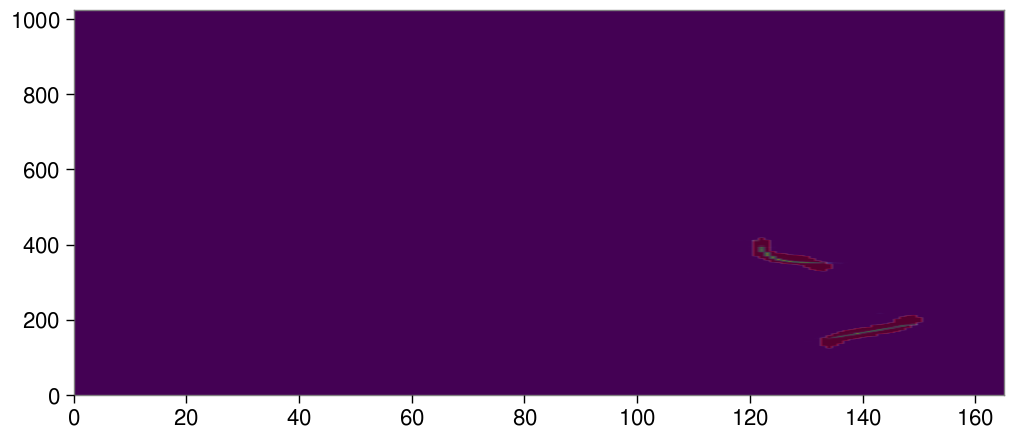

anomaly_score  glitch_score  significance  freq_start  freq_end  duration
0      29.325148      1.815598  11650.788922       274.0     402.0      96.0
1      40.493073      2.291619  13046.058380       684.0     814.0      72.0

In [12]:
from gwpy.segments import SegmentList
from gwosc.timeline import get_segments
import numpy as np
import matplotlib.pyplot as plt
from GWpyxel.processing import Pyxel


pyxel = Pyxel()
pyxel.fetch_data('H1',start=float(1256663958),
                 duration=1000.0,verbose=True,cache=True,source='LIGO')
pyxel.fetch_data('L1',start=float(1256663958),
                 duration=1000.0,verbose=True,cache=True,source='LIGO')
pyxel.config.tfmap.tres = 6
pyxel.config.tfmap.fres = 2
pyxel.inject_waveform(f'PT_A', delay=800,
                      right_ascension = 2.67,
                      declination=0.491,
                      polarization=4.549461,
                      catalog='/home/fays/Desktop/Projects/LongDurationWaveforms/LongDurationWaveforms/',
                      hrss=3e-22)

pyxel.inject_waveform(f'ISCOchirpB', delay=700,
                      right_ascension = 2.67,
                      declination=0.491,
                      polarization=4.549461,
                      catalog='/home/fays/Desktop/Projects/LongDurationWaveforms/LongDurationWaveforms/',
                      hrss=9e-22)



pyxel.generate_tfmap()
pyxel.run_albus()
pyxel.find_candidates()
pyxel.plot()
pyxel.candidates[['anomaly_score',
                                         'glitch_score','significance',
                                         'freq_start','freq_end',
                                         'duration',]]

0.8932172
0.07963848


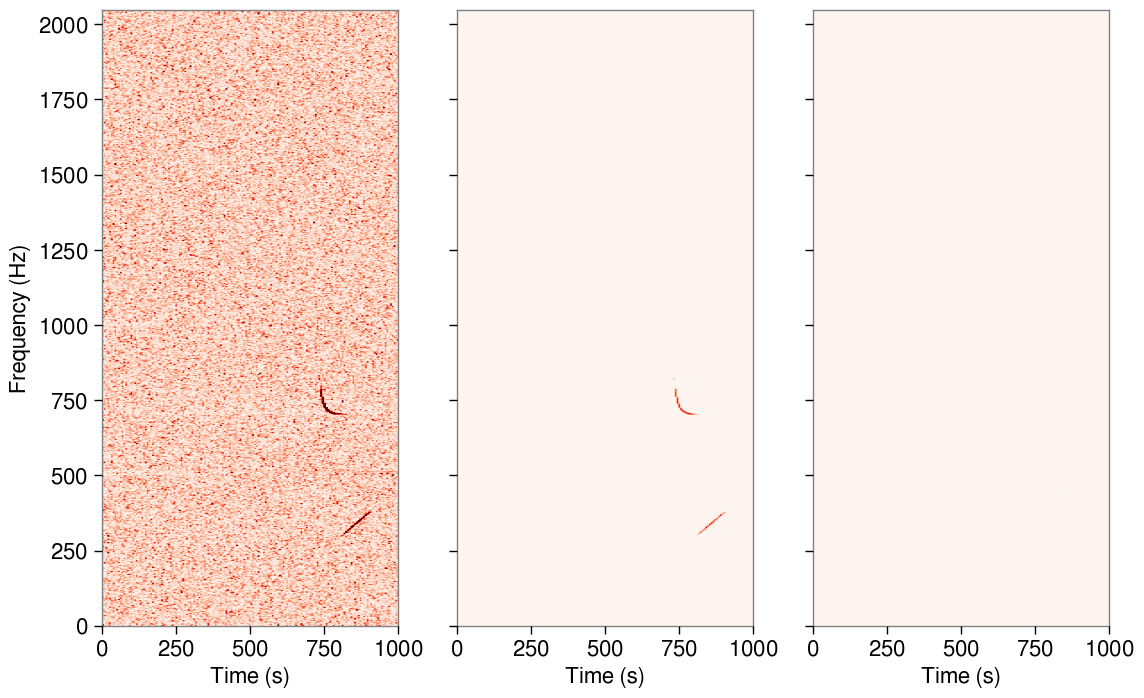

In [13]:
input_map = pyxel.spectrogram.value[:,::-1]
anomaly_map = pyxel.TFmap[::-1,:]
glitch_map = pyxel.Glitch[::-1,:]

from_freq = 0
to_freq = 2048

index_from = 1025 - int(to_freq/2)
index_to = 1025 - int(from_freq/2)

f, (ax1,ax2,ax3) = plt.subplots(1, 3, sharey=True)
f.set_size_inches(13,8)
ax1.imshow( np.swapaxes(input_map[:,index_from:index_to],0,1), aspect='auto', 
          extent=[0,1000,from_freq,to_freq], cmap='Reds', vmin=0, vmax=np.percentile(input_map,99.5))
ax2.imshow( anomaly_map[:,index_from:index_to], aspect='auto', 
          extent=[0,1000,from_freq,to_freq], cmap='Reds', vmin=0, vmax=1.0)
ax3.imshow( glitch_map[:,index_from:index_to], aspect='auto', 
          extent=[0,1000,from_freq,to_freq], cmap='Reds', vmin=0, vmax=1.0)
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('Time (s)')
ax2.set_xlabel('Time (s)')
ax3.set_xlabel('Time (s)')

print(anomaly_map.max())
print(glitch_map.max())